# Ucadity Data Analysis Project #2

James Case


# Investigating TMDb dataset: Exploration of how movie budget and revenue can predict success

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

## Introduction
Data was retrieved from Kaggle's "TMDB 5000 Movie Dataset" which is a compiled list of movies from The Movie Database(TMDb): https://www.themoviedb.org/

A link to Kaggle:https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

The data set is composed of a large number of movies along with several features about those movies that will help give some indicators of how budget will affect a film. 

## Questions
Question 1: How does budget affect the revenue of a film?

Question 2: How does budget affect the popularity of a film?

Question 3: Are films that make more money more popular?

## Data wrangling and cleaning notes

The dataset taken from kaggle contained several data columns that did not serve a purpose for these questions so they were removed. The data was then cleaned to make several columsn more readable and to remove films with erroneous budgets. Finally data was for the budgets and revenue were normalized to be better plotted.

A note about the budget, revenue and popularity columns. Kaggle noted that it was still an open question if these values were in USD. Some cross comparison to the larger movies seem that this is the case for a most of data points. This may not hold for all and can account for some uncertainty in the validity of results. In addition to this the popularity column is unclear as to what is deemed a 'good' rating. I am assuming a higher popularity score is likened to more people liking the movie, but this could be incorrect. I was unable to find anything on Kaggle or TMDb on what the meaning or source of this rating was, but it was used regardless as a back up for the vote_average column. The two seem to be related somehow and popularity may simply be a linear relationship with vote_average. 

## Question analysis

A full analysis was completed for each of the questions and this is what was found:

Q1: Budget appears to have a positive correlation with the revenue of a film. This indicates that the more a company is willing to spend on a film the larger the potential revenue. There are most likely also several other factors that can predict higher revenue, but higher production value(budget) would produce higher grossing films(revenue) due to the perceived notion that thought and effort were put into the film. It interestingly becomes even stronger one standard deviation away from the mean. It is also interesting the amount of movies that are a standard deviation below the mean budget. This could be because large blockbuster movies with large budgets outperform smaller lower budget films. 

Q2: Budget does not appear to have any effect on the popularity of the film. Judging by the graphs of Budget v. Avg. Vote and Budget v. Popularity the distribution appears to be flat and there is no correlation present. This is interesting because it almost seems to contradict Q1 where a larger budget will lead to a higher revenue. A higher budget would also seemingly lead to a higher popularity as more poeple are going to see it causing a higher revenue. 

Q3: Revenue does not appear to have any effect on the popularity of the film. Again the plots of Revenue v. Avg. Vote and Revenue v. Popularity are flat as the same as the Budget graphs. How much money a movie makes does not appear to be a good indicator if the movie is popular or not.

## Conclusion
The strong positive correlation between budget and revenue seems to be a good indicator that having a large budget can lead to a large revenue. However, this seems to be misleading. Simply because a movie has a large budget does not mean that more people will want to see it. It could be an artifact of our society where large blockbuster movies have large budget and people already want to see those movies and that is the reason they have larger revenues. There is some correleation but the actual cause will need to be explored further. 

As for budget and revenue predicting the popularity it shows no correlation between the two whatsoever. This could mean that it making an expensive film or a monetarily succesful film does not mean it is more popular than one that had a smaller budget or smaller earnings. 

In order to define success we must decide what it means to be successful in movies. We will take one success being monetarily successful and one success being popularly successful. Monetarly successful would involve having a large budget and thus hopefully a large revenue. Popularly successful would be keeping your budget small and not expecting much return, but it will be just as popular as some big name movies making much more. It depends on one's definition of success.

Limitations: There were several limitations presented by the dataset. Unfortunately the dataset provided by Kaggle had a large amount of data that was unusable for my purposes and had to be removed. In addition, vague data columns with no description did not assist in analysing the data. This is also coupled with the lack of information presented on TMDb. I am appreciative the TMDb allows Kaggle to use the data, but TMDb is definitely overshadowed by IMDb whihc has more users so it will have better data on average votes. (Unfortunately IMDb had a DMCA claim against Kaggle). Overall, the project had some good insights, but could be further explored by looking for more indicators of success of movies to see what really makes a movie successful. Further indicators to be explored could be, but not limited to, the genre, actors in the movie, and what company produced the film. 

In [2]:
df = pd.read_csv(r'C:\Users\jmcas\OneDrive\Documents\Udacity\tmdb_5000_movies.csv',index_col='id')
df.columns

Index(['budget', 'genres', 'homepage', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Now that the columns have been identified several columns with data not neccessary to my purposes will be removed.

In [3]:
#removing unnecceary columns homepage,original language, production countires, spoken languages
col_names = ['budget', 'genres', 'keywords',
       'original_title', 'overview', 'popularity', 'production_companies', 'release_date', 'revenue', 'runtime',
         'status', 'tagline', 'title', 'vote_average',
       'vote_count']
df = df[col_names]

The movie would have to be released in order for data about it to be made available, but this is a sanity check to ensure they all have been.

In [4]:
#ensuring all films status is released so films are out
check_release = []
for idx in df.index:
    if df['status'][idx] != "Released":
         check_release.append(idx)
            
#This will bring up of all movies with status not "Released". 
#All results appear to be released and will be kept event if it says otherwise
#df.loc[check_release]

Several data values show they are not released. However, further investigation of those movies show that they were completed and are published so no data was removed.

Next step is to convert the 'keywords', 'genres', and 'production_companies' columns into readable columns. Currently they are strings of a list of dictionary items. The below code will remove the string and take the value of the 'name'key in each dictionary in the list and then place them as strings inside of a new list.

In [5]:
def dict_to_list(dataframe,column_name):
    new = []
    for idx in dataframe.index:
        temp = literal_eval(dataframe.loc[idx][column_name])
        r=[]
        for i in np.arange(0,len(temp)):
            r.append(temp[i]['name'])
        new.append(r)
    dataframe[column_name] = new
dict_to_list(df,'keywords')
dict_to_list(df,'genres')
dict_to_list(df,'production_companies')

Now that most cells are in a readable format I will begin to remove rows where the budget = 0. The reasoning for this is that this is most likely due to missing data on the film and not that the movie actually had no budget. This is a bit of an assumption to say that a film cannot have 0 budget, but I believe that it is okay to make because in reality everyone involved in a movie needs to get paid (actors, crew, food, vehicles, sets, props, etc.) and it would be very unlikely for it to cost nothing.

The other option would be to fill the missing budgets with mean data. However, it may be dangerous to do in this case as the dropped values are a few hundred and may skew the data too much.

In [6]:
no_budget = []
for idx in df.index:
    if df.loc[idx]["budget"] ==0:
        no_budget.append(idx)

#This is the new df that will be used for the rest of the exercise
#dropping by index
df_budget = df.drop(no_budget,axis=0)

In [7]:
#Checking to see any missing values
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3766 entries, 19995 to 72766
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3766 non-null   int64  
 1   genres                3766 non-null   object 
 2   keywords              3766 non-null   object 
 3   original_title        3766 non-null   object 
 4   overview              3763 non-null   object 
 5   popularity            3766 non-null   float64
 6   production_companies  3766 non-null   object 
 7   release_date          3766 non-null   object 
 8   revenue               3766 non-null   int64  
 9   runtime               3764 non-null   float64
 10  status                3766 non-null   object 
 11  tagline               3368 non-null   object 
 12  title                 3766 non-null   object 
 13  vote_average          3766 non-null   float64
 14  vote_count            3766 non-null   int64  
dtypes: float64(3), i

There are missing values in overview, runtime, and tagline. This is okay as they are only kept for posterity and will not be used in any calculations. 

The next step will be to get a general idea of where most of the values for the columns lie and get a distibution of them.

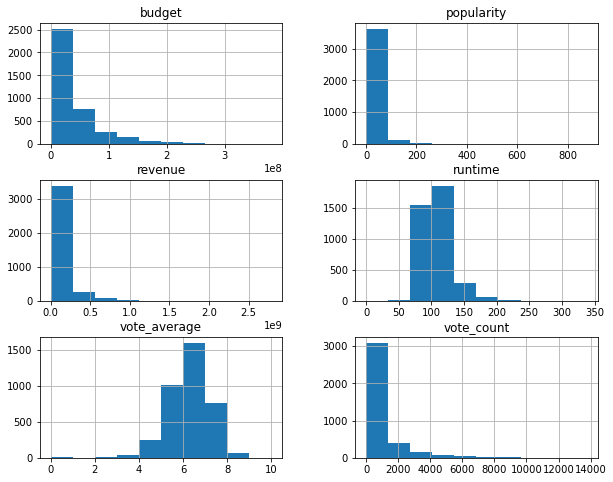

In [8]:
df_budget.hist(figsize=(10,8));

The first plot will be of the budget vs revenue. 

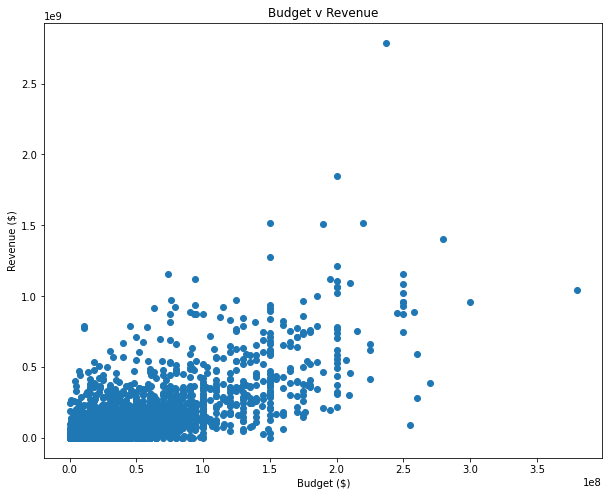

In [9]:
plt.figure(1,figsize=(10,8))
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Budget v Revenue')
plt.plot(df_budget['budget'],df_budget['revenue'],'o');

The resulting plot looks great. However, both revenue and budget have outliers that can be removed to produce a tighter graph.

In [10]:
#Removing budget and revenue outliers to tighten the spread
bud_out = []
for idx in df_budget.index:
    if df_budget.loc[idx]['budget'] > 3.5e8:
        bud_out.append(idx)

        
rev_out = []
for idx in df_budget.index:
    if df_budget.loc[idx]['revenue'] > 2.5e9:
        rev_out.append(idx)
        
out_df = bud_out + rev_out

df_budget = df_budget.drop(out_df,axis=0)

The removal of some outliers can be seen below. The points now seems to be better distributed across the entire plot.

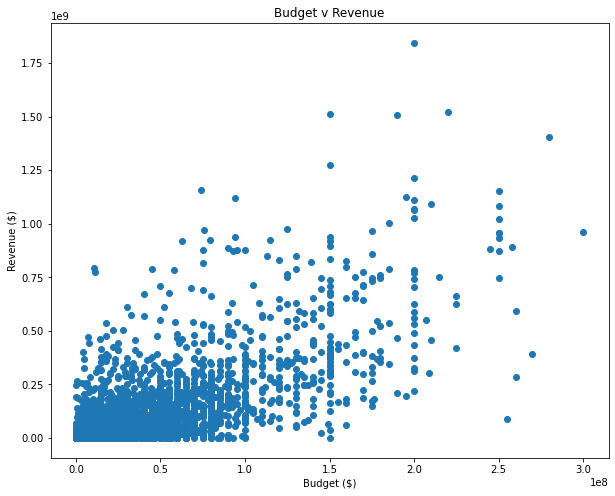

In [11]:
plt.figure(2,figsize=(10,8))
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Budget v Revenue')
plt.plot(df_budget['budget'],df_budget['revenue'],'o');

The plot is better distributed, but now the units of the budget and revenue seem somewhat unwieldy being in the millions. It may be useful to see the graphs displayed as normalized values. 
### Using the formula $z = \frac{x_i - \mu}{\sigma}$

In [12]:
df_budget.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.764000e+03,3764.000000,3.764000e+03,3762.000000,3764.000000,3764.000000
mean,3.689860e+07,25.922504,1.029915e+08,109.303296,6.226169,852.502391
std,4.216383e+07,34.341251,1.715275e+08,20.736576,0.966350,1331.585274
min,1.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+06,7.970944,6.000000e+06,95.000000,5.700000,114.000000
50%,2.300000e+07,17.598061,3.877084e+07,105.000000,6.300000,365.000000
75%,5.000000e+07,33.915033,1.217653e+08,120.000000,6.900000,966.250000
max,3.000000e+08,875.581305,1.845034e+09,338.000000,10.000000,13752.000000


In [13]:
#normalize budget and revenue
df_budget.describe()
df_budget['budget']=(df_budget['budget'] - df_budget['budget'].mean())/df_budget['budget'].std()
df_budget['revenue']=(df_budget['revenue'] - df_budget['revenue'].mean())/df_budget['revenue'].std()
df_budget.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.764000e+03,3764.000000,3.764000e+03,3762.000000,3764.000000,3764.000000
mean,-2.130012e-15,25.922504,3.782250e-15,109.303296,6.226169,852.502391
std,1.000000e+00,34.341251,1.000000e+00,20.736576,0.966350,1331.585274
min,-8.751244e-01,0.001586,-6.004370e-01,0.000000,0.000000,0.000000
25%,-6.853883e-01,7.970944,-5.654572e-01,95.000000,5.700000,114.000000
50%,-3.296332e-01,17.598061,-3.744042e-01,105.000000,6.300000,365.000000
75%,3.107260e-01,33.915033,1.094509e-01,120.000000,6.900000,966.250000
max,6.239978e+00,875.581305,1.015606e+01,338.000000,10.000000,13752.000000


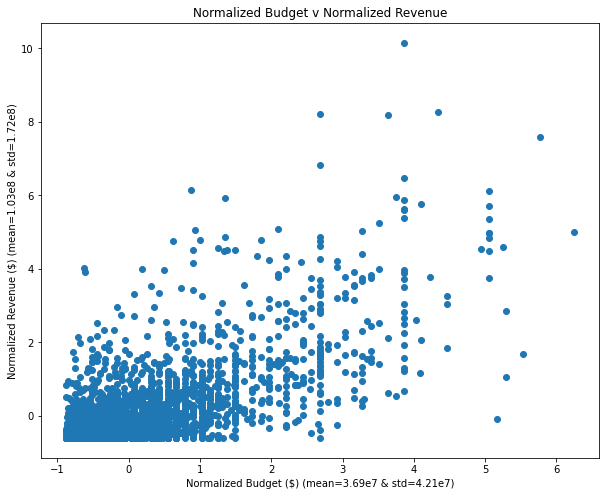

In [14]:
plt.figure(3,figsize=(10,8))
plt.xlabel('Normalized Budget ($) (mean=3.69e7 & std=4.21e7)')
plt.ylabel('Normalized Revenue ($) (mean=1.03e8 & std=1.72e8)')
plt.title('Normalized Budget v Normalized Revenue')
plt.plot(df_budget['budget'],df_budget['revenue'],'o');

The Budget v Revenue graphs show a strong positive correlation as budget increases. It interestingly becomes even stronger one standard deviation away from the mean. It is also interesting the amount of movies that are a standard deviation below the mean budget. This could be because large blockbuster movies with large budgets outperform smaller lower budget films. 

The following graphs will look at the popularity of a movie given the budget and then given the revenue. 

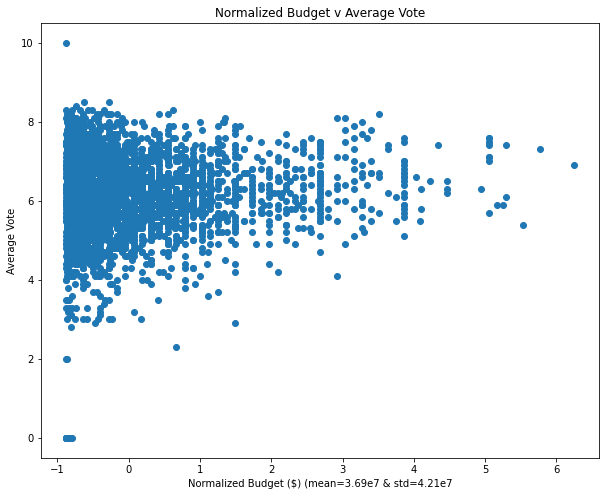

In [15]:
plt.figure(4,figsize=(10,8))
plt.xlabel('Normalized Budget ($) (mean=3.69e7 & std=4.21e7')
plt.ylabel('Average Vote')
plt.title('Normalized Budget v Average Vote')
plt.plot(df_budget['budget'],df_budget['vote_average'],'o');

The normalized budget v average vote shows a flat distribution suggesting there is not much correlation between budget and popularity. 

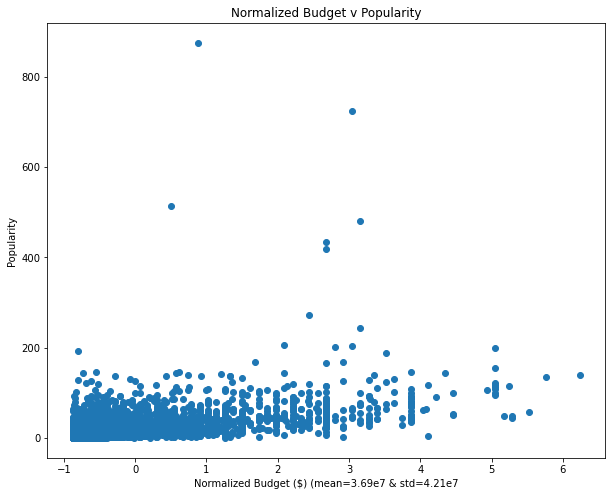

In [16]:
plt.figure(5,figsize=(10,8))
plt.xlabel('Normalized Budget ($) (mean=3.69e7 & std=4.21e7')
plt.ylabel('Popularity')
plt.title('Normalized Budget v Popularity')
plt.plot(df_budget['budget'],df_budget['popularity'],'o');

The normalized budget v popularity shows a flat distribution suggesting there is not much correlation between budget and popularity. Interestingly there are more outliers than the average vote columns. This could be due to errors in calculating popularity by TMDb as mentioned above. 

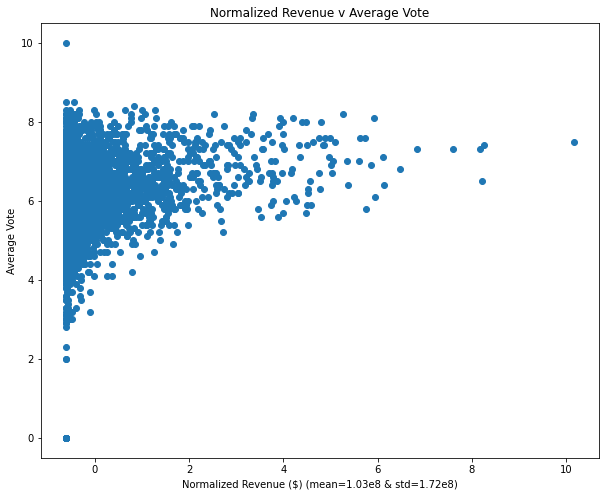

In [17]:
plt.figure(6,figsize=(10,8))
plt.xlabel('Normalized Revenue ($) (mean=1.03e8 & std=1.72e8)')
plt.ylabel('Average Vote')
plt.title('Normalized Revenue v Average Vote')
plt.plot(df_budget['revenue'],df_budget['vote_average'],'o');

The normalized revenue v average vote shows a flat distribution suggesting there is not much correlation between budget and popularity. 

I will reduce the revenue axis in order to see more of the distribution on the lower revenue side of the graph. 

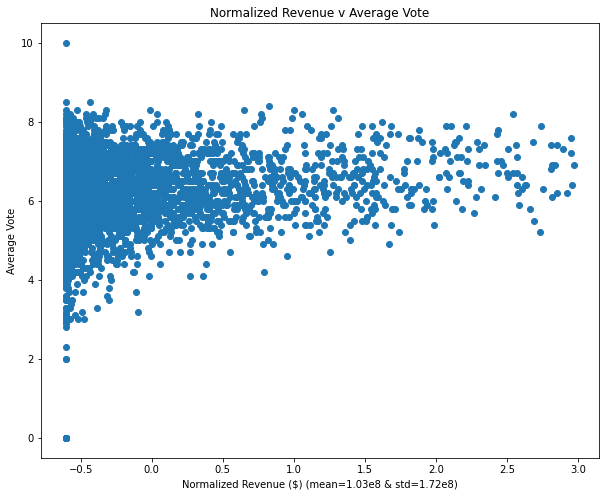

In [18]:
plt.figure(7,figsize=(10,8))
plt.xlabel('Normalized Revenue ($) (mean=1.03e8 & std=1.72e8)')
plt.ylabel('Average Vote')
plt.title('Normalized Revenue v Average Vote')
plt.plot(df_budget.revenue[df_budget.revenue<3],df_budget['vote_average'][df_budget.revenue<3],'o');

The graph appears even flatter than it did before without the outliers showing there may be no correlation between revenue and average vote. 

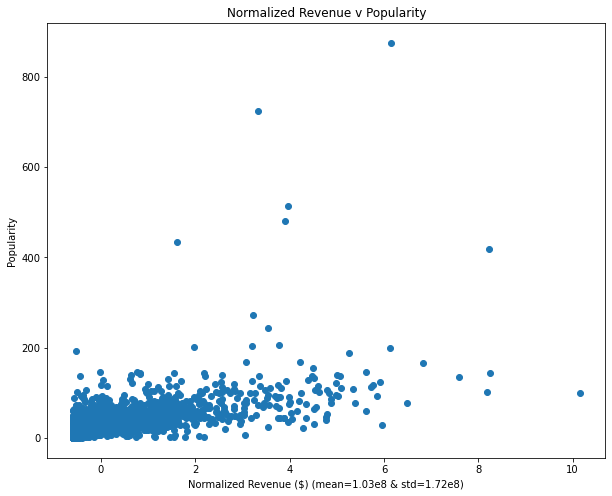

In [19]:
plt.figure(8,figsize=(10,8))
plt.xlabel('Normalized Revenue ($) (mean=1.03e8 & std=1.72e8)')
plt.ylabel('Popularity')
plt.title('Normalized Revenue v Popularity')
plt.plot(df_budget['revenue'],df_budget['popularity'],'o');

Again there appears to be no correlation between revenue and popularity. 